# XEFI
### An example of generating a basic XEFI for a mutlilayer interface.

In [1]:
import XEFI
import kkcalc as kk
import numpy as np

d:\Github\XEFI\XEFI\models\results.py:161: SyntaxWarning: invalid escape sequence '\c'
  """
d:\Github\XEFI\XEFI\models\results.py:342: SyntaxWarning: invalid escape sequence '\c'
  """


In [2]:
refractive_db = kk.models.asp_db_complex
# refractive_air = refractive_db("N2")
refractive_air = 1.0 + 0j
refractive_P3HT = refractive_db("C10H14S", density = 1.33, name="P3HT") 
refractive_PS = refractive_db("C8H8", density = 1.05, name="PS")
refractive_Si = refractive_db("Si", density = 2.33, name="Si")

D:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\common.py:382: UserWarning: Setting a formula mass will not be internally used when a `stoichiometry` has been assigned.
  warnings.warn(
D:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1888: UserWarning: When generating `asp_complex`, the energy intervals of real (10.00, 30000.00) and imaginary (10.00, 500000.00) components don't match.
  warnings.warn(
D:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1907: UserWarning: Real energies are a subset of imaginary energies, truncating imaginary energies to match real.
  warnings.warn(
D:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:616: UserWarning: ( : P3HT
Energy0	Energy1	C_1	C_0	C_-1	C_-2	C_-3
--------------------------------------
10.000	10.162	3.892	-26.800	0.000	0.000	0.000
10.162	10.326	4.029	-28.188	0.000	0.000	0.000
10.326	10.493	

In [17]:
# Define some system parameters
beam_energy = (XEFI.models.basic.en2wav) / 1.54  # in eV
print(f"{beam_energy:0.2f} eV")
# beam_energy = 2450  # in eV
angles = np.linspace(0.1, 0.8, 1000)  # in degrees

z = [
    0,
    # -600,
    -800,
    # -900,
    # -1200,
] # Define the z-coordinates for the multilayer interface

refractive_indicies: list[kk.models.asp_complex] = [
    refractive_air,
    refractive_PS,
    # refractive_P3HT,
    refractive_Si,
    # refractive_Si,
] #  
labels = ["Air"] + [
    ref.name
    for ref in refractive_indicies[1:]
]

8050.92 eV


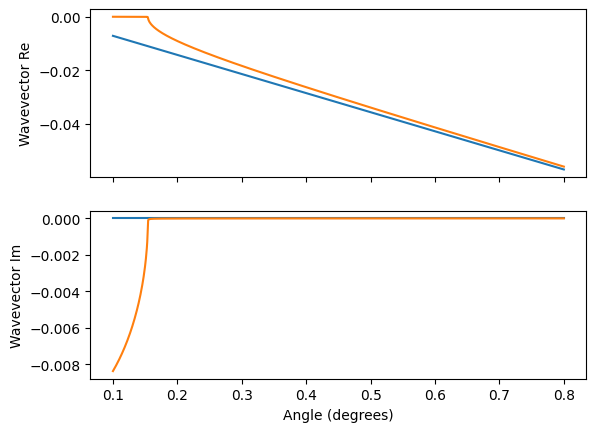

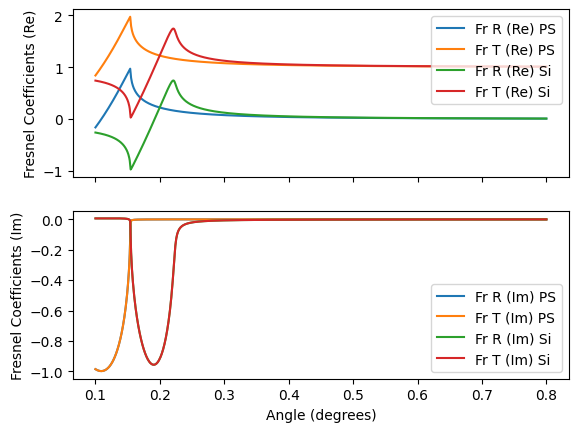

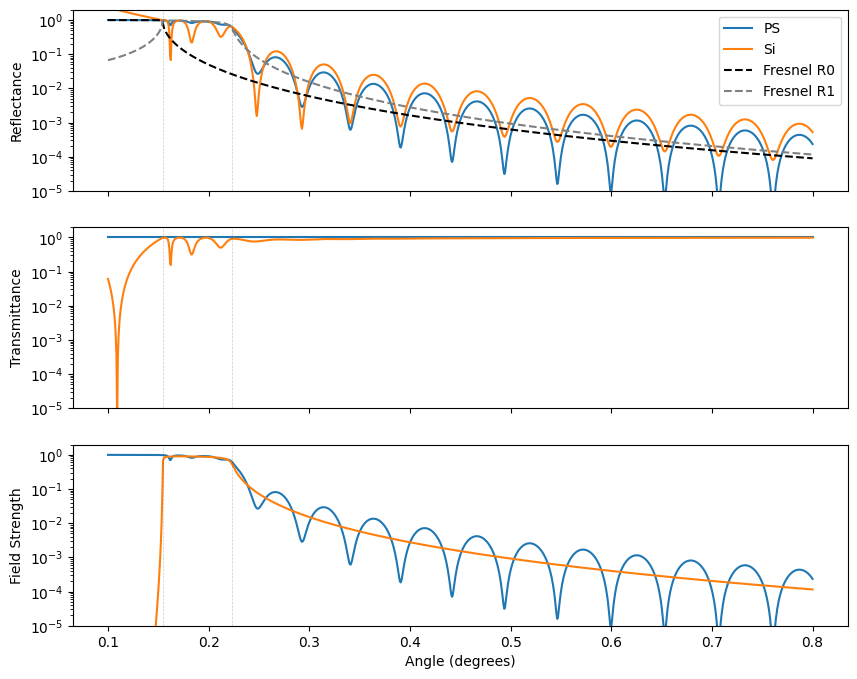

In [18]:
result = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    # z_roughness=[10, 10, 10],
    layer_names=labels,
)

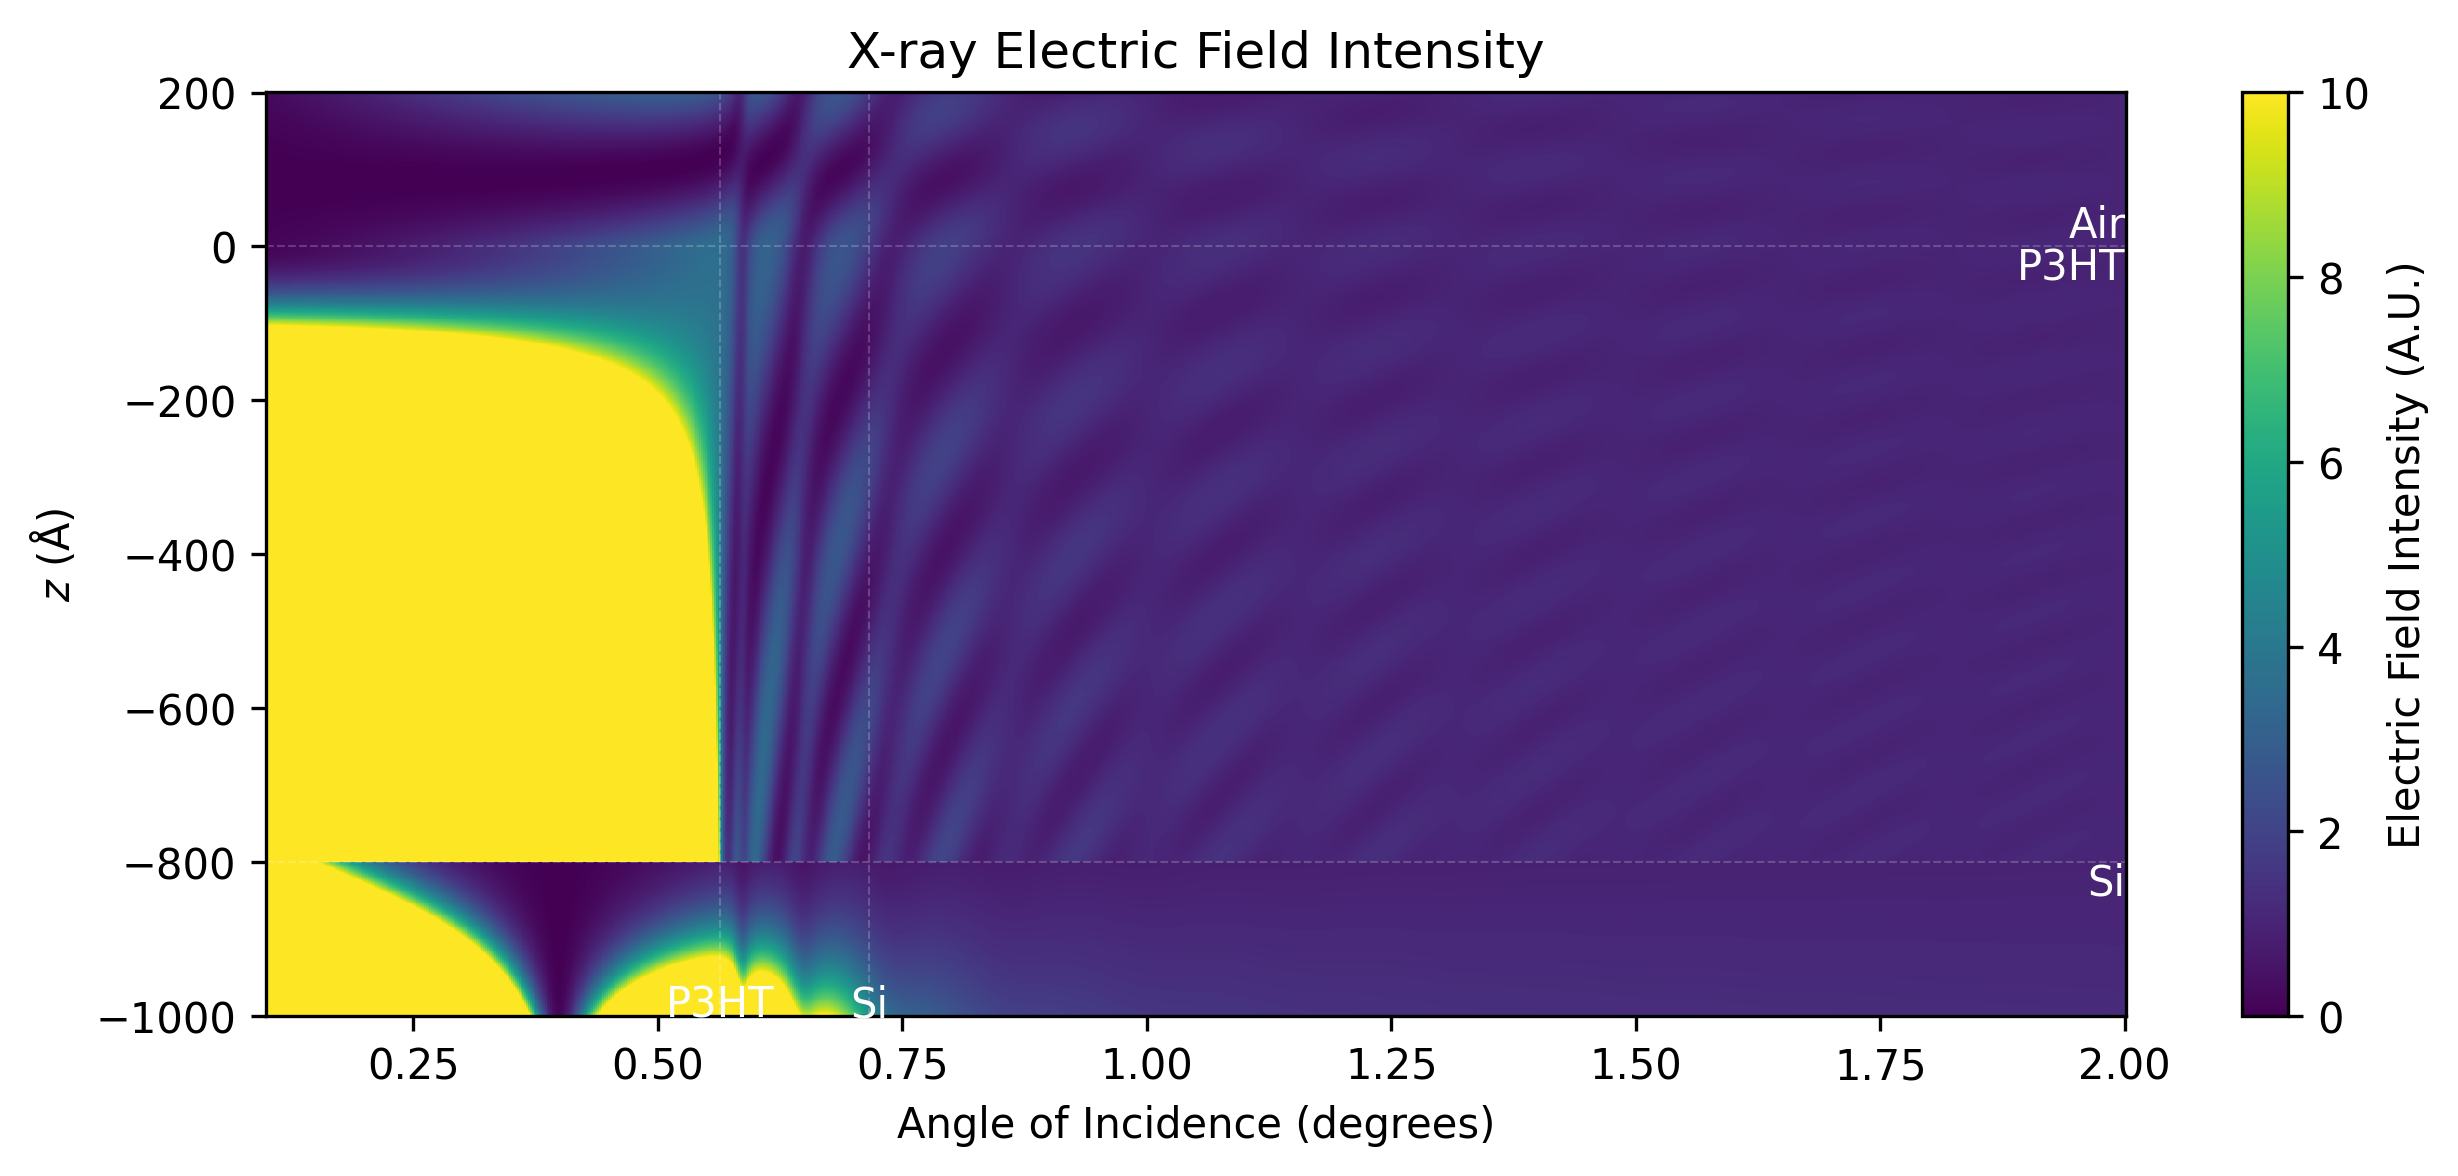

In [5]:
z_vals = np.linspace(200, -1000, 1000)

import matplotlib.colors as mc
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig,ax = result.generate_pretty_figure_XEFI(z_vals, norm=norm)

